A minimal example.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

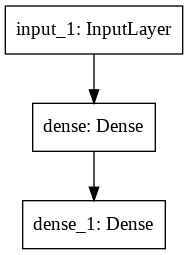

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png')

In [0]:
# a separate model, just for convenience
encoder = Model(input_img, encoded)

In [0]:
# a separate model, just for convenience
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2774 - val_loss: 0.1866
Epoch 2/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1692 - val_loss: 0.1529
Epoch 3/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1435 - val_loss: 0.1326
Epoch 4/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1275 - val_loss: 0.1203
Epoch 5/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1175 - val_loss: 0.1124
Epoch 6/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1108 - val_loss: 0.1070
Epoch 7/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1060 - val_loss: 0.1027
Epoch 8/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1024 - val_loss: 0.0995
Epoch 9/20
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0997 - val_

In [0]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

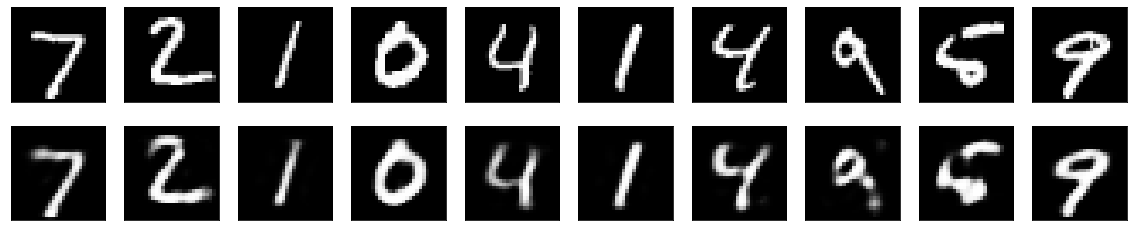

In [0]:
import matplotlib.pyplot as plt

n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()